In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 3s 2ms/step - loss: 0.6952
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5489
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4900
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4652
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4525
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4445
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4387
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4344
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4311
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4285


In [ ]:
model.layers[0].get_weights()

[array([[-0.14534494, -0.07794479,  0.03783413],
        [ 1.5270514 ,  1.6579125 , -0.77696294],
        [-0.24739662, -0.37326455, -0.12344727],
        [ 0.35307926,  0.581744  ,  0.06445266],
        [ 0.19493453,  0.13450699,  0.4378197 ],
        [-0.12485343, -0.3886849 , -0.0902102 ],
        [-0.41727784, -0.18932438,  0.8654517 ],
        [ 0.12587374,  0.37822214,  0.07829495],
        [-0.06145194,  0.20143926, -0.843144  ],
        [-0.04489663,  0.0990677 , -0.05328678],
        [-0.01487292, -0.1598072 ,  0.5500416 ]], dtype=float32),
 array([-0.5657185 , -0.46734247,  0.8866482 ], dtype=float32)]

In [ ]:
y_log = model.predict(X_test_scaled)
y_log

array([[0.13477343],
       [0.141742  ],
       [0.14079201],
       ...,
       [0.07695027],
       [0.13387276],
       [0.37911728]], dtype=float32)

In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.8155

In [ ]:
model = Sequential()

model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)
history

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3204 - accuracy: 0.8692 - val_loss: 0.3561 - val_accuracy: 0.8494
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3214 - accuracy: 0.8697 - val_loss: 0.3553 - val_accuracy: 0.8487
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3215 - accuracy: 0.8681 - val_loss: 0.3568 - val_accuracy: 0.8481
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3213 - accuracy: 0.8695 - val_loss: 0.3552 - val_accuracy: 0.8481
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3210 - accuracy: 0.8673 - val_loss: 0.3548 - val_accuracy: 0.8500
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3213 - accuracy: 0.8695 - val_loss: 0.3580 - val_accuracy: 0.8469
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3207 - accuracy: 0.8687 - val_loss: 0.3552 - val_accuracy: 0.8494

In [ ]:
model.layers[1].get_weights()

[array([[ 5.65188408e-01,  3.25764865e-01,  4.45903540e-01,
         -1.02796412e+00,  5.54558039e-01,  2.96196248e-02,
          4.40824747e-01,  1.79137334e-01,  1.07962050e-01,
         -6.54895425e-01,  4.36670572e-01],
        [ 7.04220951e-01,  3.13241899e-01, -3.41764599e-01,
          1.06645271e-01, -2.98725754e-01, -8.02926540e-01,
         -5.50865591e-01,  3.63530785e-01,  4.75979634e-02,
          1.02075964e-01, -9.88763645e-02],
        [ 3.03743064e-01,  9.08894762e-02, -3.55186963e+00,
          2.23295480e-01, -6.37612104e-01,  5.65595865e-01,
         -4.25443918e-01,  1.89378470e-01,  9.92100462e-02,
         -1.04395159e-01, -3.72372419e-02],
        [ 3.38321000e-01,  4.51560050e-01,  1.07023132e+00,
          8.11114669e-01,  3.59545082e-01, -1.48300216e-01,
         -3.74917015e-02, -2.32813382e+00,  3.40392068e-02,
         -1.58478081e+00,  4.72417444e-01],
        [ 4.24224660e-02, -2.68587172e-02, -1.15483813e-01,
         -4.52956498e-01,  8.45209062e-01,  

In [ ]:
y_log = model.predict(X_test_scaled)
y_log

array([[0.04012702],
       [0.07313763],
       [0.04436807],
       ...,
       [0.01820681],
       [0.02391444],
       [0.38271317]], dtype=float32)

In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
import matplotlib.pyplot as plt

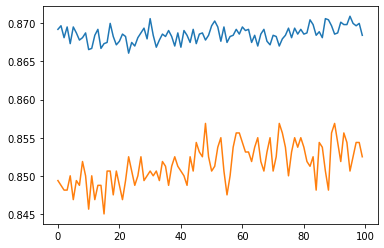

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

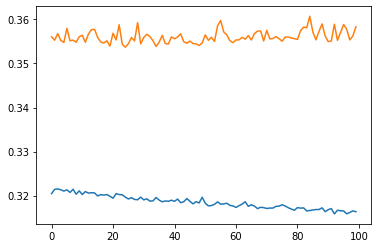

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])